In [111]:
pip install collection

Note: you may need to restart the kernel to use updated packages.


In [112]:
import os #for input output operations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns
from collections import Counter
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [113]:
#setting the working directory

os.chdir("C:/Users/uzer")
print(os.getcwd())

C:\Users\uzer


In [114]:
#loading the data

train = pd.read_csv("train_cab_fare.csv", na_values={"pickup_datetimes":"43"})
test = pd.read_csv("test_cab_fare.csv")

In [115]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [116]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [117]:
train

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


In [118]:
test

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
...,...,...,...,...,...,...
9909,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6


In [119]:
test.tail()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
9909,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6
9913,2015-01-18 14:06:23 UTC,-73.988022,40.754070,-74.000282,40.759220,6


In [120]:
train.tail()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0
16066,8.5,2011-12-14 06:24:33 UTC,-74.002111,40.729755,-73.983877,40.761975,NaN


In [121]:
train.shape

(16067, 7)

In [122]:
test.shape

(9914, 6)

In [123]:
train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [124]:
test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [125]:
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963642,40.768014,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [126]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


## Data Preprocessing

### Data exploring and Missing Value Analysis

In [127]:
#convert fare_amount from object to numeric 
train["fare_amount"] = pd.to_numeric(train["fare_amount"], errors = "coerce")

In [128]:
train.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [129]:
train.shape

(16067, 7)

In [130]:
train.dropna(subset = ["pickup_datetime"]) #dropping na value

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


In [138]:
# Here pickup_datetime variable is in object so we need to change its data type to datetime

train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [139]:
#separating date,month,year
train['year'] = train['pickup_datetime'].dt.year
train['month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute



In [140]:
# Rechecking data types after conversion
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                          int32
month                         int32
Date                          int32
Day                           int32
Hour                          int32
Minute                        int32
dtype: object

In [142]:
test["pickup_datetime"]=pd.to_datetime(test["pickup_datetime"],format="%Y-%m-%d %H:%M:%S UTC")

In [143]:
test['year'] = test['pickup_datetime'].dt.year
test['month'] = test['pickup_datetime'].dt.month
test['Date'] = test['pickup_datetime'].dt.day
test['Day'] = test['pickup_datetime'].dt.dayofweek
test['Hour'] = test['pickup_datetime'].dt.hour
test['Minute'] = test['pickup_datetime'].dt.minute

In [144]:


test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int32
month                         int32
Date                          int32
Day                           int32
Hour                          int32
Minute                        int32
dtype: object

In [145]:
# Removing pickup_datetime missing values rows

train = train.drop(train[train['pickup_datetime'].isnull()].index, axis=0)
print(train.shape)
print(train['pickup_datetime'].isnull().sum())

(9914, 13)
0


In [146]:
# Checking passenger count variable

train['passenger_count'].describe()

count    9860.00000
mean        3.23911
std        77.52472
min         0.00000
25%         1.00000
50%         1.00000
75%         2.00000
max      5345.00000
Name: passenger_count, dtype: float64

In [30]:
 #Removing the passanger count having count>6

train = train.drop(train[train["passenger_count"]> 6 ].index, axis=0)

In [31]:
train["passenger_count"].describe()

count    9840.000000
mean        1.645368
std         1.272406
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: passenger_count, dtype: float64

In [32]:
train["passenger_count"].sort_values(ascending=True)

5150    0.0
4354    0.0
5277    0.0
7520    0.0
3599    0.0
       ... 
8007    NaN
8076    NaN
8139    NaN
8259    NaN
8306    NaN
Name: passenger_count, Length: 9894, dtype: float64

In [33]:
# Removing passanger_count missing values rows

train = train.drop(train[train['passenger_count'].isnull()].index, axis=0)
print(train.shape)
print(train['passenger_count'].isnull().sum())

(9840, 13)
0


In [34]:
# There is one passenger count value of 0.12 which is not possible. 
# Hence we will remove fractional passenger value
train=train.drop(train[train['passenger_count']==0.12].index, axis=0)

In [35]:
train.shape

(9839, 13)

Fare_amount Variable

In [36]:
 #Finding decending order of fare_amount to get to know whether the outliers are present or not
train["fare_amount"].sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 9839, dtype: float64

In [37]:
# Fare amount has a negative value, which doesn't make sense. 
Counter(train["fare_amount"]<0)

Counter({False: 9837, True: 2})

In [38]:
# Remove those fields which has -ve values
train=train.drop(train[train['fare_amount']<0].index, axis=0)
print(train.shape)


(9837, 13)


In [39]:
# Make sure there is no negative values in the fare_amount variable column
train["fare_amount"].min()

0.01

In [40]:
# Remove the row where fare amount is zero
train=train.drop(train[train['fare_amount']<1].index,axis=0)
train.shape

(9836, 13)

In [41]:
# fare_amount variable in descending order

train['fare_amount'].sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 9836, dtype: float64

In [42]:
# Removing the missing value rows

train=train.drop(train[train["fare_amount"].isnull()].index, axis=0)
train.shape

(9812, 13)

In [43]:
# Removing the outlier 54343 and 4343 which are far greater than 453

train=train.drop(train[train["fare_amount"]>453].index, axis=0)
train.shape


(9810, 13)

In [44]:
# fare_amount variable in descending order

train['fare_amount'].sort_values(ascending=False)



607     453.00
980     434.00
1335    180.00
1483    165.00
6630    128.83
         ...  
922       2.50
958       2.50
8263      2.50
3168      2.50
1427      1.14
Name: fare_amount, Length: 9810, dtype: float64

In [45]:
train['fare_amount'].describe()

count    9810.000000
mean       11.349130
std        11.449192
min         1.140000
25%         6.000000
50%         8.500000
75%        12.500000
max       453.000000
Name: fare_amount, dtype: float64

pickup_Latitute and pickup_longitude variable

In [46]:
# Lattitude----> (-90 to 90)
# Longitude----> (-180 to 180)

# We need to drop the rows having  pickup_lattitude and pickup_longitude out of the above mentioned range

train[train['pickup_latitude']<-90]
train[train['pickup_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute
5686,3.3,2012-07-24 04:44:26,-73.947235,401.083332,-73.951392,40.778927,1.0,2012.0,7.0,24.0,1.0,4.0,44.0


In [47]:
# Dropping one row having the value >90
train = train.drop((train[train['pickup_latitude']<-90]).index, axis=0)
train = train.drop((train[train['pickup_latitude']>90]).index, axis=0)

In [48]:
train['pickup_latitude'].sort_values(ascending=False)

3075    41.366138
9808    41.366138
6416    41.366138
7043    41.366138
5663    41.366138
          ...    
2147   -73.986968
3827   -73.988467
4783   -73.991840
9548   -73.992947
8443   -74.006893
Name: pickup_latitude, Length: 9809, dtype: float64

In [49]:
train[train['pickup_longitude']<-180]
train[train['pickup_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute


In [50]:
train.shape


(9809, 13)

In [51]:
# As we have given pickup_longitute and pickup_latitude values.So,we need to calculate the distance using the haversine formula.
# Haversine formula(the great circle distance between two points on the earth (specified in decimal degrees))

from math import radians, cos, sin, asin, sqrt
def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    
    # Convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))

    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km


In [52]:
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [53]:
test['distance'] = test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [54]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute,distance
0,4.5,2015-01-27 13:08:24,-73.844311,40.721319,-73.841610,40.712278,1.0,2015.0,1.0,27.0,1.0,13.0,8.0,1.030764
1,16.9,2015-01-27 13:08:24,-74.016048,40.711303,-73.979268,40.782004,1.0,2015.0,1.0,27.0,1.0,13.0,8.0,8.450134
2,5.7,2011-10-08 11:53:44,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,10.0,8.0,5.0,11.0,53.0,1.389525
3,7.7,2012-12-01 21:12:12,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,12.0,1.0,5.0,21.0,12.0,2.799270
4,5.3,2012-12-01 21:12:12,-73.968095,40.768008,-73.956655,40.783762,1.0,2012.0,12.0,1.0,5.0,21.0,12.0,1.999157


In [56]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [58]:
train.nunique()

fare_amount           367
pickup_datetime      1751
pickup_longitude     8819
pickup_latitude      9042
dropoff_longitude    8858
dropoff_latitude     9041
passenger_count         8
year                    7
month                  12
Date                   31
Day                     7
Hour                   24
Minute                 60
distance             9536
dtype: int64

In [59]:
# Finding decending order of distance to get to know whether the outliers are presented or not.

train['distance'].sort_values(ascending=False)

9147    8667.542104
8647    8667.497512
2397    8667.454421
472     8667.304968
4597    8666.566030
           ...     
4793       0.000000
4777       0.000000
4769       0.000000
4740       0.000000
7982       0.000000
Name: distance, Length: 9809, dtype: float64

OBSERVATIONS

As we can see that top 23 values in the distance variables are very high.
It means more than 8000 Kms distance they have travelled.
Just after 23rd value from the top, the distance goes down to 129, which means these values are showing some outliers.
We need to remove these values.

In [60]:
Counter(train['distance'] == 0)

Counter({False: 9535, True: 274})

In [61]:
Counter(test['distance']==0)

Counter({False: 9829, True: 85})

In [62]:
# We will remove the rows whose distance value is zero

train = train.drop(train[train['distance']== 0].index, axis=0)
train.shape

(9535, 14)

In [63]:
# We will remove the rows whose distance values is very high, which is more than 129kms.

train = train.drop(train[train['distance'] > 130 ].index, axis=0)
train.shape

(9523, 14)

In [64]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute,distance
0,4.5,2015-01-27 13:08:24,-73.844311,40.721319,-73.841610,40.712278,1.0,2015.0,1.0,27.0,1.0,13.0,8.0,1.030764
1,16.9,2015-01-27 13:08:24,-74.016048,40.711303,-73.979268,40.782004,1.0,2015.0,1.0,27.0,1.0,13.0,8.0,8.450134
2,5.7,2011-10-08 11:53:44,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,10.0,8.0,5.0,11.0,53.0,1.389525
3,7.7,2012-12-01 21:12:12,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,12.0,1.0,5.0,21.0,12.0,2.799270
4,5.3,2012-12-01 21:12:12,-73.968095,40.768008,-73.956655,40.783762,1.0,2012.0,12.0,1.0,5.0,21.0,12.0,1.999157


In [65]:
drop1 = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']

train = train.drop(drop1, axis = 1)

In [66]:
train.head()

,fare_amount,passenger_count,year,month,Date,Day,Hour,distance
0,4.5,1.0,2015.0,1.0,27.0,1.0,13.0,1.030764
1,16.9,1.0,2015.0,1.0,27.0,1.0,13.0,8.450134
2,5.7,2.0,2011.0,10.0,8.0,5.0,11.0,1.389525
3,7.7,1.0,2012.0,12.0,1.0,5.0,21.0,2.799270
4,5.3,1.0,2012.0,12.0,1.0,5.0,21.0,1.999157


In [68]:
train['passenger_count'] = train['passenger_count'].astype('int64')
train['Year'] = train['year'].astype('int64')
train['Month'] = train['month'].astype('int64')
train['Date'] = train['Date'].astype('int64')
train['Day'] = train['Day'].astype('int64')
train['Hour'] = train['Hour'].astype('int64')

In [69]:
train.dtypes

fare_amount        float64
passenger_count      int64
year               float64
month              float64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
Year                 int64
Month                int64
dtype: object

In [70]:
drop2 = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']

test = test.drop(drop2, axis = 1)

In [71]:
test.head()

,passenger_count,year,month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


In [72]:
test['passenger_count'] = test['passenger_count'].astype('int64')
test['Year'] = test['year'].astype('int64')
test['Month'] = test['month'].astype('int64')
test['Date'] = test['Date'].astype('int64')
test['Day'] = test['Day'].astype('int64')
test['Hour'] = test['Hour'].astype('int64')

In [73]:
test.dtypes

passenger_count      int64
year                 int32
month                int32
Date                 int64
Day                  int64
Hour                 int64
distance           float64
Year                 int64
Month                int64
dtype: object

DATA VISUALISATION

<Axes: xlabel='passenger_count', ylabel='count'>

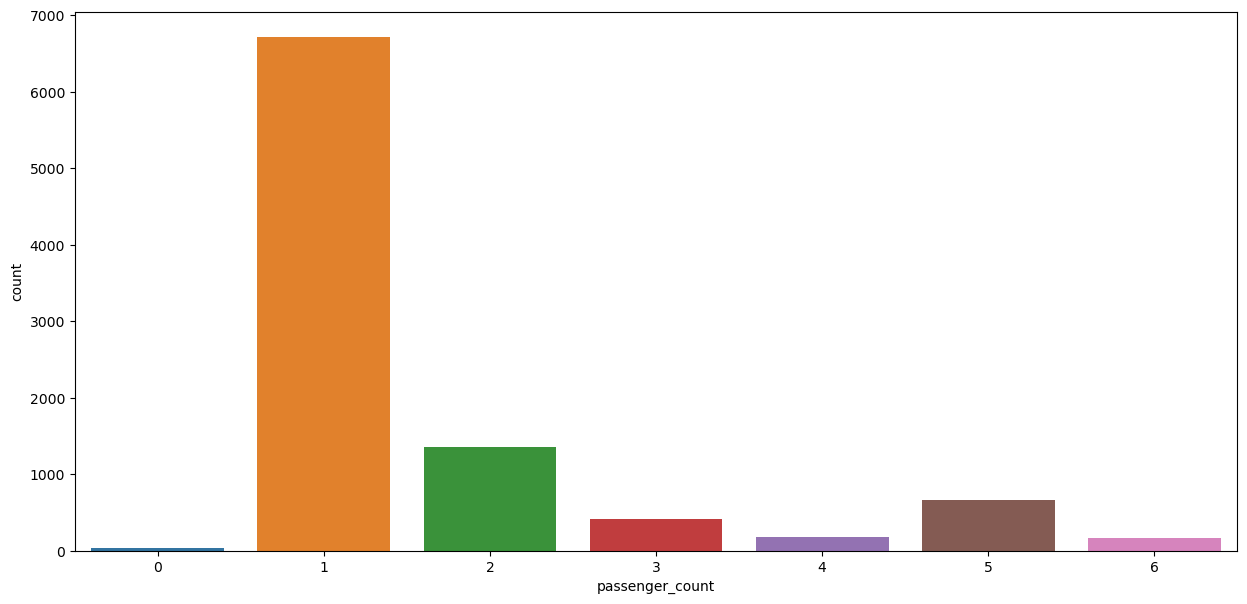

In [74]:
plt.figure(figsize=(15,7))
sns.countplot(x="passenger_count", data=train)

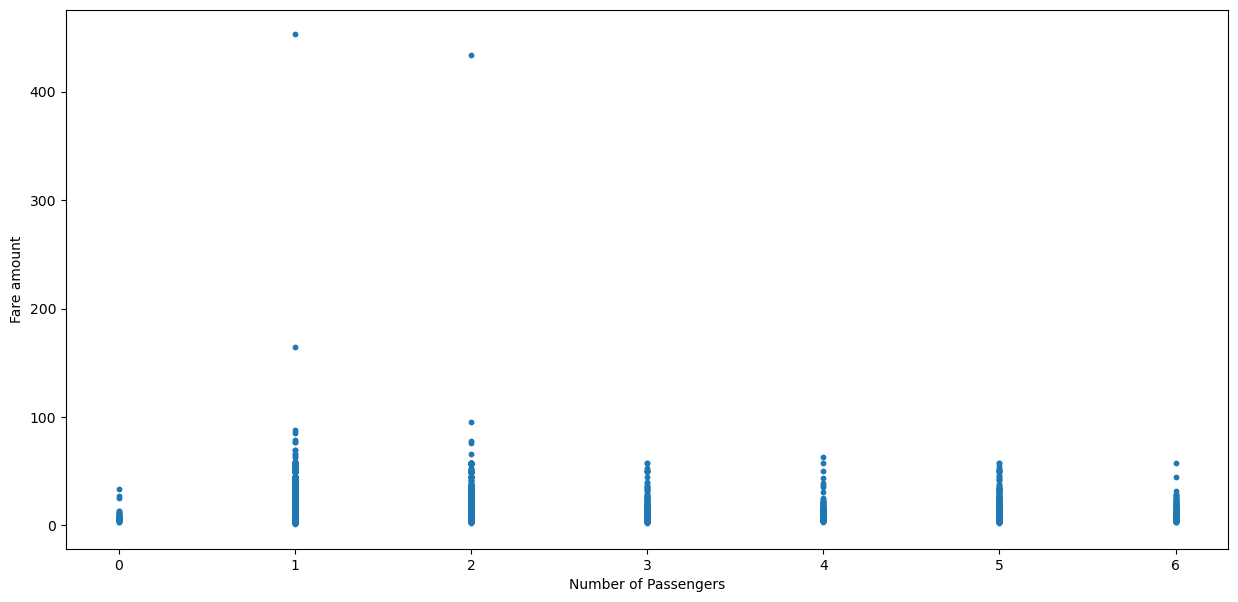

In [75]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=10)
plt.xlabel('Number of Passengers')
plt.ylabel('Fare amount')
plt.show()

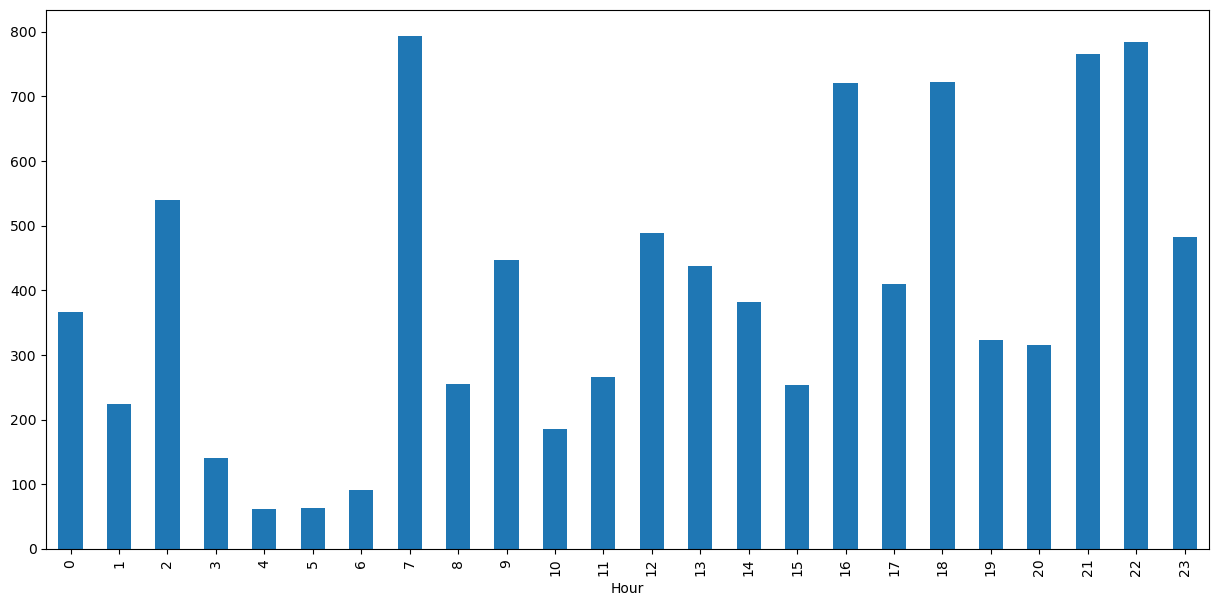

In [76]:
plt.figure(figsize=(15,7))
train.groupby(train["Hour"])['Hour'].count().plot(kind="bar")
plt.show()


<Axes: xlabel='Day', ylabel='count'>

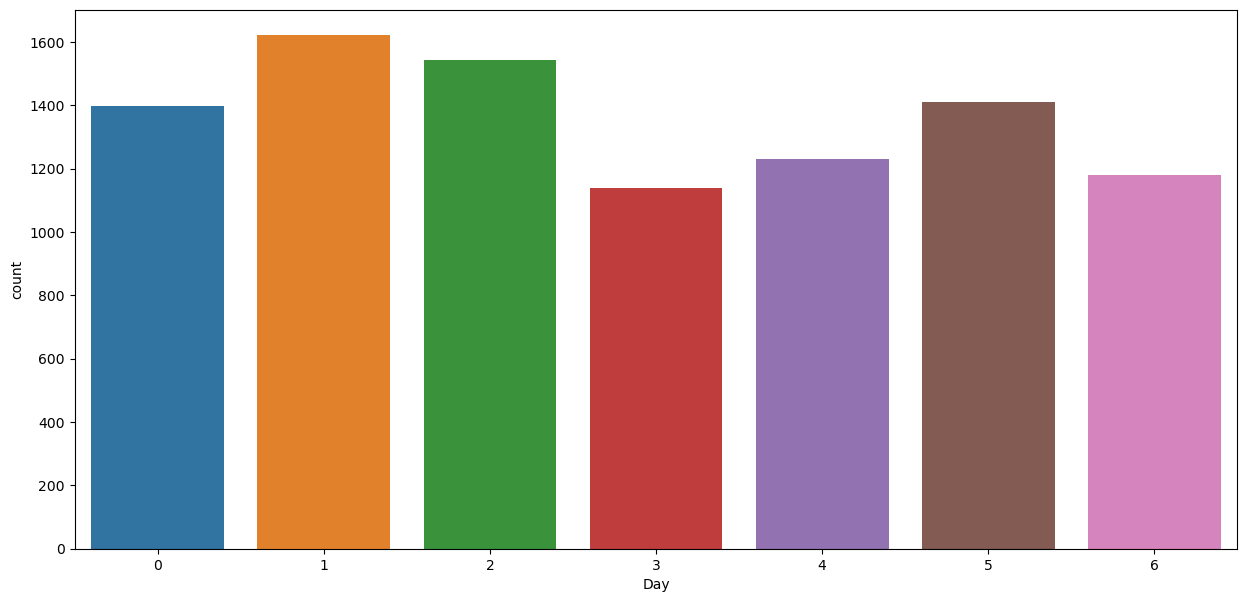

In [77]:
# Impact of Day on the number of cab rides

plt.figure(figsize=(15,7))
sns.countplot(x="Day", data=train)

APPLYING ML MODELS


In [78]:
# train test split for further modelling

x_train, x_test, y_train, y_test = train_test_split( train.iloc[:, train.columns != 'fare_amount'], 
                         train.iloc[:, 0], test_size = 0.20, random_state = 1)

In [79]:
print(x_train.shape)
print(x_test.shape)

(7618, 9)
(1905, 9)


Linear Regression Model


In [80]:
# Building model on top of training dataset

model = LinearRegression().fit(x_train , y_train)

In [81]:
# Prediction on train data

pred_train_LR = model.predict(x_train)

In [82]:
# Prediction on test data

pred_test_LR= model.predict(x_test)

In [83]:
# RMSE for train data

RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

In [84]:
# RMSE for test data

RMSE_test_LR= np.sqrt(mean_squared_error(y_test, pred_test_LR))

In [87]:
print("Root Mean Squared Error for Train data = "+str(RMSE_train_LR))

print("Root Mean Squared Error for Test data = "+str(RMSE_test_LR))

Root Mean Squared Error for Train data = 9.822323262364467
Root Mean Squared Error for Test data = 5.533963394501256


In [88]:
# Calculate R_square for train data

from sklearn.metrics import r2_score

r2_score(y_train, pred_train_LR)

0.2941668316821784

In [89]:
r2_score(y_test, pred_test_LR)

0.6558069661027117

In [ ]:
DECISION TREE MODEL

In [90]:
DT_MODEL = DecisionTreeRegressor(max_depth = 2).fit(x_train,y_train)

In [91]:
# Prediction on train data

pred_train_DT = DT_MODEL.predict(x_train)



# Prediction on test data

pred_test_DT = DT_MODEL.predict(x_test)

In [92]:
# Calculating RMSE for train data

RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))



# Calculating RMSE for test data

RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))


In [93]:
print("Root Mean Squared Error for Train data = "+str(RMSE_train_DT))
print("Root Mean Squared Error for Test data = "+str(RMSE_test_DT))


Root Mean Squared Error for Train data = 8.688074933046947
Root Mean Squared Error for Test data = 4.820540203380075


In [94]:
# R_square calculation for train data

r2_score(y_train, pred_train_DT)

0.4477690635809346

In [95]:
# R_square calculation for test data

r2_score(y_test, pred_test_DT)

0.738831418222117

# RANDOM FOREST

In [96]:
RF_MODEL = RandomForestRegressor(n_estimators = 200).fit(x_train,y_train)

In [97]:
# Prediction on train data

pred_train_RF = RF_MODEL.predict(x_train)

# Prediction on test data

pred_test_RF = RF_MODEL.predict(x_test)

In [98]:
# Calculating RMSE for train data

RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))

# Calculating RMSE for test data

RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

In [99]:
print("Root Mean Squared Error for Train data = "+str(RMSE_train_RF))
print("Root Mean Squared Error for Test data = "+str(RMSE_test_RF))

Root Mean Squared Error for Train data = 3.446939966229025
Root Mean Squared Error for Test data = 5.872456700267535


In [100]:
# Calculate R_square for train data

r2_score(y_train, pred_train_RF)

0.9130757292826244

In [101]:
# Calculate R_square for test data

r2_score(y_test, pred_test_RF)

0.6124130386115603

In [103]:
 #Grid Search CV for random Forest model

regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

In [104]:
# Create the grid

grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

In [105]:
# Grid Search Cross-Validation with 5 fold CV

gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)

gridcv_rf = gridcv_rf.fit(x_train,y_train)

view_best_params_GRF = gridcv_rf.best_params_

In [106]:
test.dtypes

passenger_count      int64
year                 int32
month                int32
Date                 int64
Day                  int64
Hour                 int64
distance           float64
Year                 int64
Month                int64
dtype: object

In [107]:
#Apply model on test data

predictions_GRF_test = gridcv_rf.predict(test)

predictions_GRF_test



array([ 8.48120038,  9.26229688,  5.08504143, ..., 52.94013564,
       20.5675    ,  6.31082168])

In [108]:
test['Predicted_fare'] = predictions_GRF_test


In [109]:
test.head()

,passenger_count,year,month,Date,Day,Hour,distance,Year,Month,Predicted_fare
0,1,2015,1,27,1,13,2.323259,2015,1,8.481200
1,1,2015,1,27,1,13,2.425353,2015,1,9.262297
2,1,2011,10,8,5,11,0.618628,2011,10,5.085041
3,1,2012,12,1,5,21,1.961033,2012,12,7.670690
4,1,2012,12,1,5,21,5.387301,2012,12,15.395442


In [110]:
test.to_csv('test.csv')